## Import libraries

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

from collections import Counter

In [175]:
data = pd.read_csv("cars.csv")

## Drop NAs

In [176]:
data = data.dropna(subset = ["year", "selling_price", "km_driven", "fuel", "transmission", "owner", "engine", "max_power"])

In [177]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Split some string data to convert to int or float and also make multivariate dummies

In [178]:
data["engine"] = data['engine'].str.split(' ').str[0]
data["max_power"] = data['max_power'].str.split(' ').str[0]
data["owner_class"] = data["owner"].map({'First Owner':0, 'Second Owner':1, "Third Owner": 2, "Fourth & Above Owner": 3})
data["fuel"] = data["fuel"].map({'Diesel':0, 'Petrol':1})
data["transmission"] = data["transmission"].map({'Manual':0, 'Automatic':1})

In [179]:
data["owner_class_2"] = data["owner_class"].map({0:0, 1:1, 2:1, 3: 1})

In [180]:
data.groupby('owner_class_2').count()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_class
owner_class_2,,,,,,,,,,,,,,
0.0,5215,5215,5215,5215,5165,5215,5215,5215,5215,5215,5215,5215,5215,5215
1.0,2687,2687,2687,2687,2649,2687,2687,2687,2687,2687,2687,2686,2687,2687


In [181]:
data = data.dropna(subset=["engine"])
data["engine"] = data["engine"].map(int)
data["selling_price"] = data["selling_price"].apply(lambda x: np.log1p(x))
data["km_driven"] = data["km_driven"].apply(lambda x: np.log1p(x))
data["engine"] = data["engine"].apply(lambda x: np.log1p(x))

## Subset data of interest

In [182]:
data2 = data[["selling_price", "km_driven", "year", "fuel", "transmission", "owner_class", "engine"]]

In [183]:
data2 = data2.dropna(subset = ["year", "selling_price", "km_driven", "fuel", "transmission", "engine", "owner_class"])

In [184]:
data2

,selling_price,km_driven,year,fuel,transmission,owner_class,engine
0,13.017005,11.887938,2014,0.0,0,0.0,7.130099
1,12.821261,11.695255,2014,0.0,0,1.0,7.312553
2,11.970357,11.849405,2006,1.0,0,2.0,7.311886
3,12.323860,11.751950,2010,0.0,0,0.0,7.242082
4,11.775297,11.695255,2007,1.0,0,0.0,7.169350
...,...,...,...,...,...,...,...
8123,12.676079,11.608245,2013,1.0,0,0.0,7.088409
8124,11.813037,11.686887,2007,0.0,0,3.0,7.309212
8125,12.853179,11.695255,2009,0.0,0,0.0,7.130099
8126,12.577640,10.126671,2013,0.0,0,0.0,7.242082


## Fit k-means with k = 2, create labels

In [185]:
kmeans = KMeans(n_clusters=2).fit(data2)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data2['labels'] = labels

(6.0, 15.0)

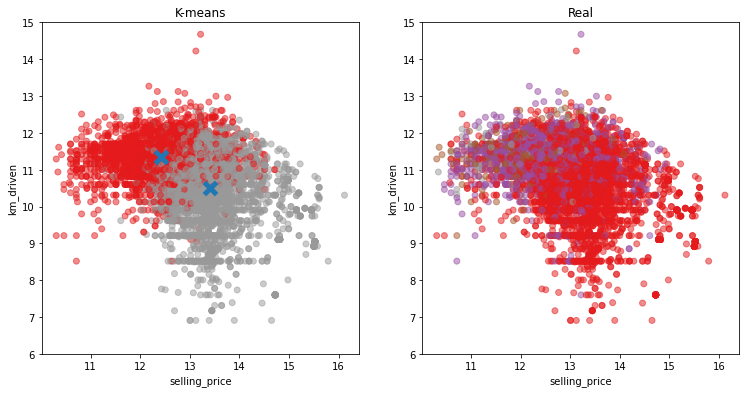

In [186]:
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c="labels", cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])

## Fit k-means with k = 2, create labels, but only in 2-D

In [187]:
kmeans = KMeans(n_clusters=2).fit(data2[["selling_price", "km_driven"]])
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
#data2['labels'] = labels
kmeans.score(data2[["selling_price", "km_driven"]])

-6431.287901669276

(6.0, 15.0)

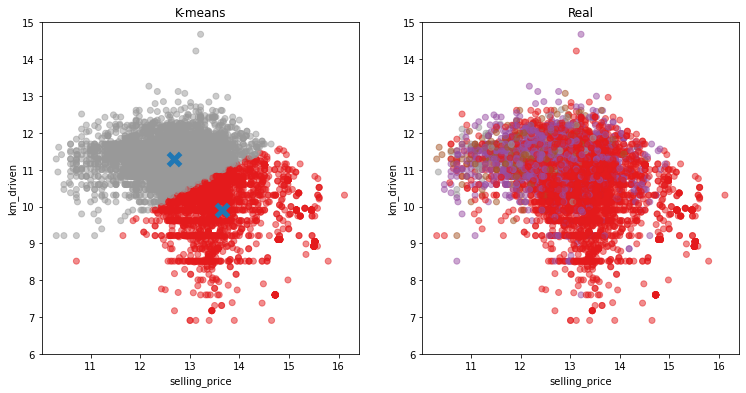

In [188]:
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c=labels, cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])

## Try k=3

In [189]:
start = time.time()
kmeans = KMeans(n_clusters=3).fit(data2)
stop = time.time()
print(f"Training time: {stop - start}s")
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data2['labels'] = labels
kmeans.score(data2)

Training time: 0.05499672889709473s


-37534.81594596649

(6.0, 15.0)

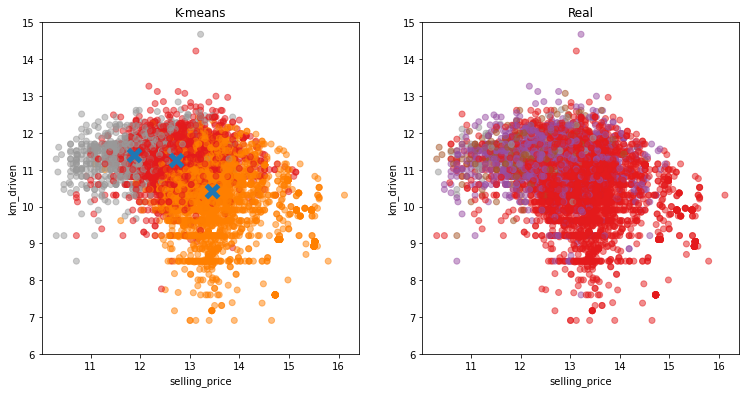

In [190]:
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c="labels", cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])

## Try elkan algorithm with k=3

In [191]:
start = time.time()
kmeans = KMeans(n_clusters=3, algorithm="elkan").fit(data2)
stop = time.time()
print(f"Training time: {stop - start}s")
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data2['labels'] = labels
kmeans.score(data2)

Training time: 0.06799578666687012s


-49869.402724653126

(6.0, 15.0)

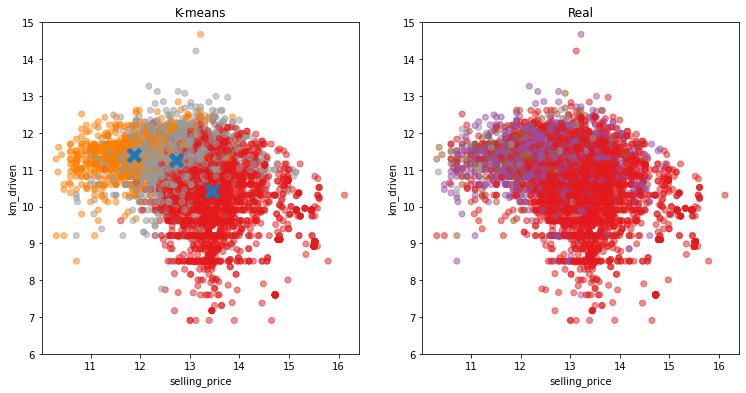

In [192]:
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c="labels", cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])

## Try k=4

In [193]:
kmeans = KMeans(n_clusters=4).fit(data2)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data2['labels'] = labels
kmeans.score(data2)

-36136.57913246399

(6.0, 15.0)

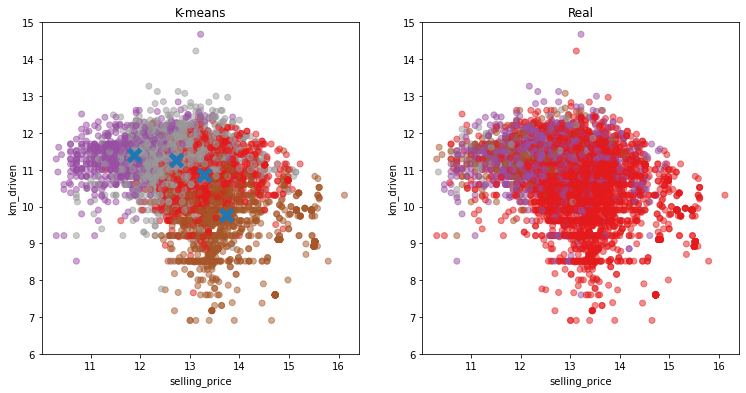

In [194]:
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c="labels", cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])

## Look at the elbow

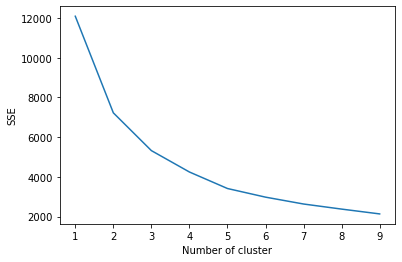

In [195]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2[["selling_price", "km_driven", "engine"]])
    data2["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

C:\Users\romat\AppData\Local\Temp/ipykernel_19652/1787530330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['labels'] = labels


(6.0, 15.0)

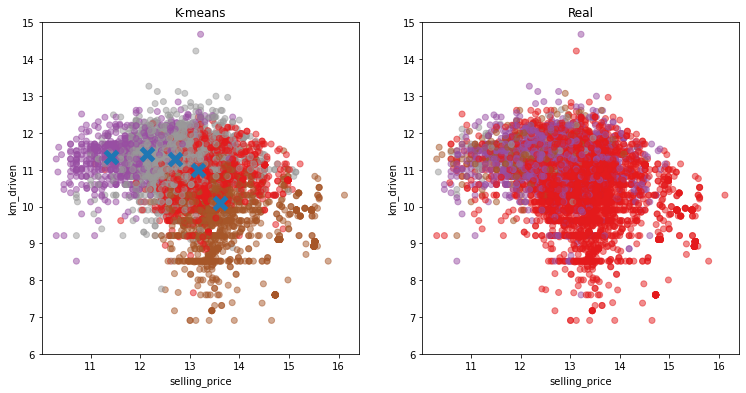

In [196]:
data3 = data2[["selling_price", "km_driven", "year", "fuel", "transmission", "owner_class", "engine"]]
kmeans = KMeans(n_clusters=5).fit(data3)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data3['labels'] = labels
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c="labels", cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])

In [197]:
data3.groupby("labels").count()

,selling_price,km_driven,year,fuel,transmission,owner_class,engine
labels,,,,,,,
0,1055,1055,1055,1055,1055,1055,1055
1,2205,2205,2205,2205,2205,2205,2205
2,2476,2476,2476,2476,2476,2476,2476
3,1837,1837,1837,1837,1837,1837,1837
4,241,241,241,241,241,241,241


C:\Users\romat\AppData\Local\Temp/ipykernel_19652/1060442539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['labels'] = labels


(6.0, 15.0)

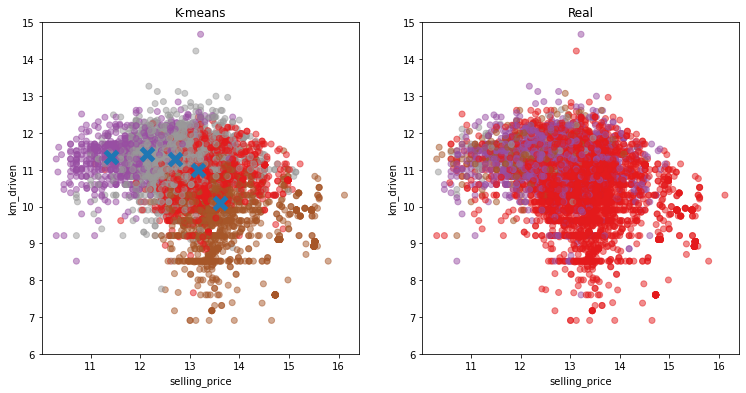

In [198]:
data3 = data2[["selling_price", "km_driven", "year", "fuel", "transmission", "owner_class", "engine"]]

kmeans = KMeans(n_clusters=5, algorithm="elkan").fit(data3)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data3['labels'] = labels
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
#ax.set_xlim([])
ax.title.set_text('K-means')
ax.scatter(x = "selling_price", y = "km_driven", c="labels", cmap = "Set1", data = data2, alpha = 0.5)
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
ax.set_ylim([6, 15])
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Real')
ax.set_xlabel("selling_price")
ax.set_ylabel("km_driven")
ax.scatter(x = "selling_price", y = "km_driven", c="owner_class", cmap = "Set1", data = data, alpha = 0.5)
ax.set_ylim([6, 15])